# Wine Quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA
Let's start by open dataset and doing exploratory data analysis.

In [17]:
df = pd.read_csv('Dataset/winequality-white.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [18]:
print('Number of rows in the dataset: {}.'.format(df.shape[0]))
print('Number of columns in the dataset: {}.'.format(df.shape[1]))

Number of rows in the dataset: 4898.
Number of columns in the dataset: 12.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [20]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total']/df.shape[0])*100
missing.sort_values(by='%', ascending=False)

Total    %
fixed acidity             0  0.0
volatile acidity          0  0.0
citric acid               0  0.0
residual sugar            0  0.0
chlorides                 0  0.0
free sulfur dioxide       0  0.0
total sulfur dioxide      0  0.0
density                   0  0.0
pH                        0  0.0
sulphates                 0  0.0
alcohol                   0  0.0
quality                   0  0.0

In [21]:
df.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

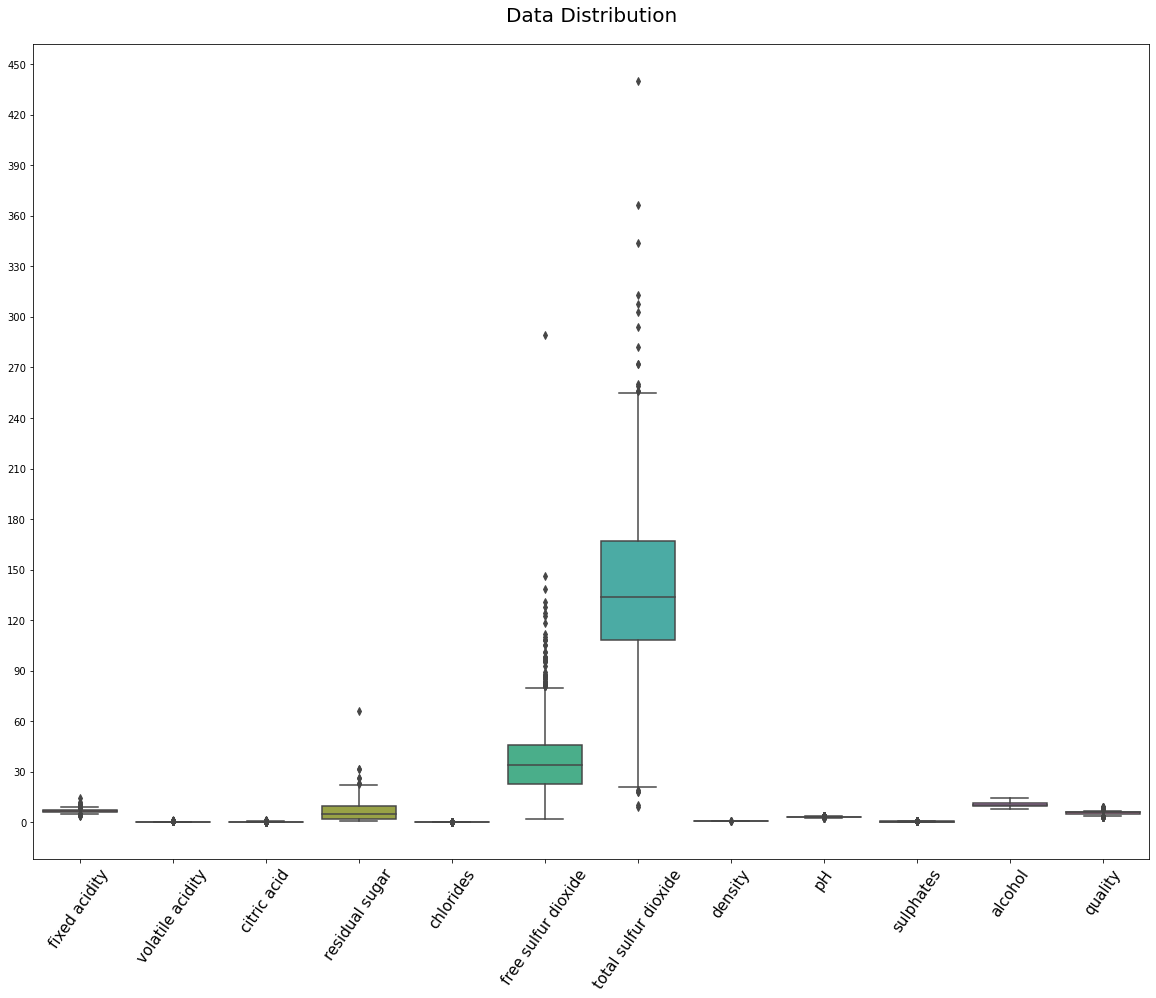

In [22]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

In [24]:
cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

for c in cols:
    upper_level = df[c].mean() + 3*df[c].std()
    lower_level = df[c].mean() - 3*df[c].std()
    df = df[(df[c] > lower_level) & (df[c] < upper_level)]

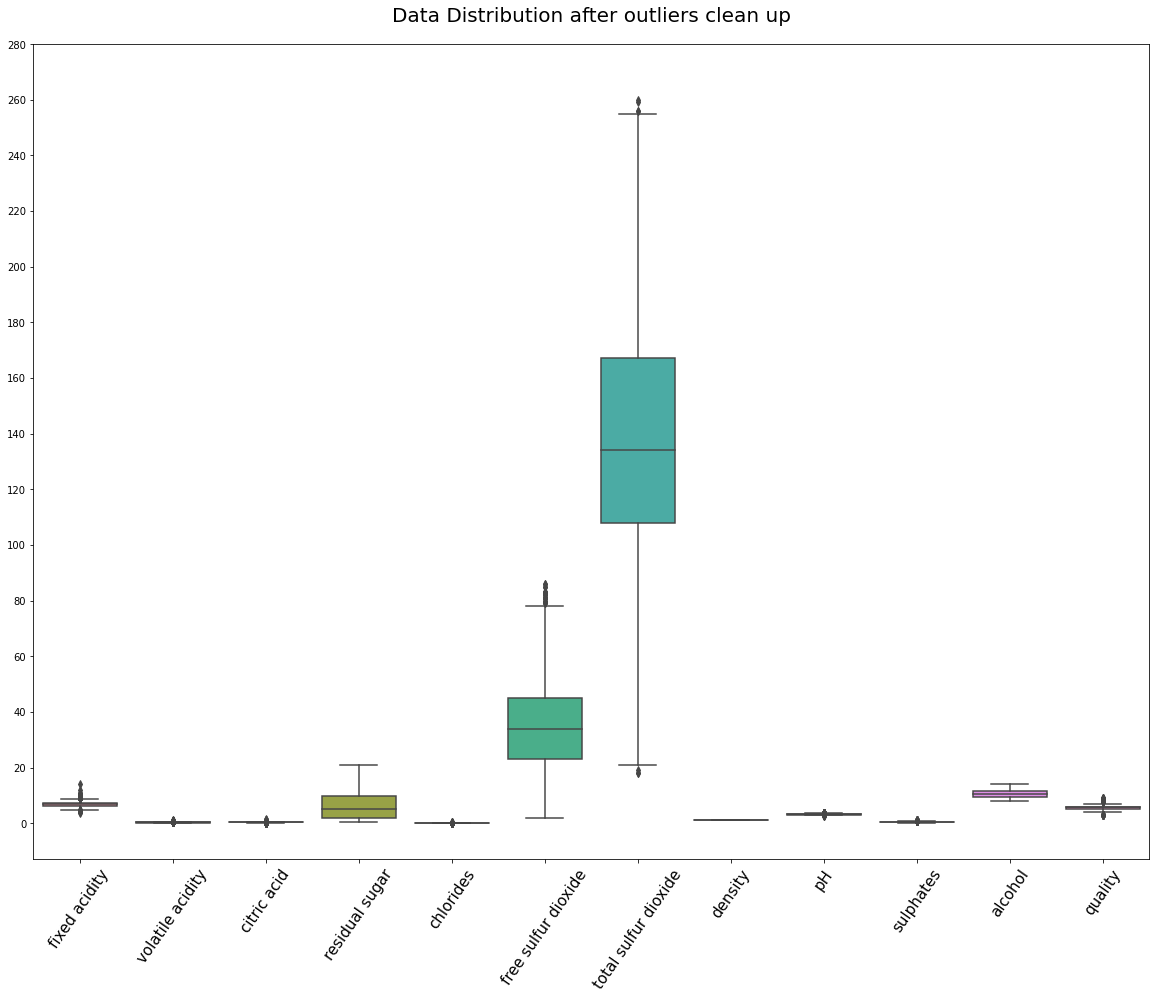

In [25]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

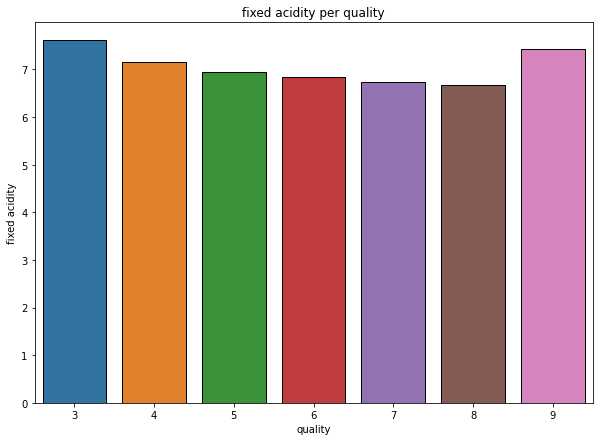

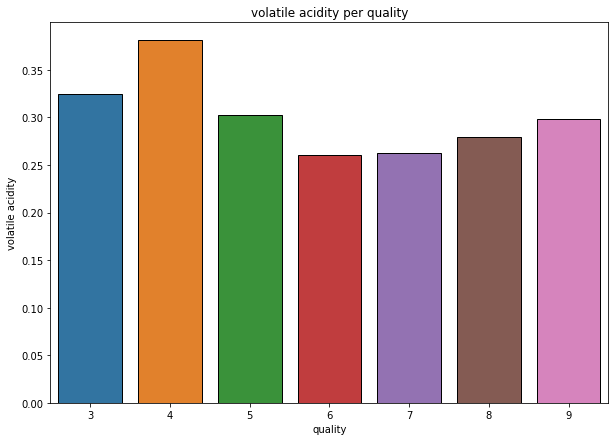

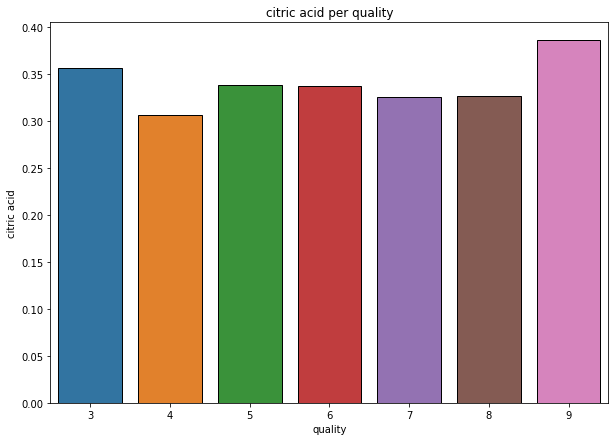

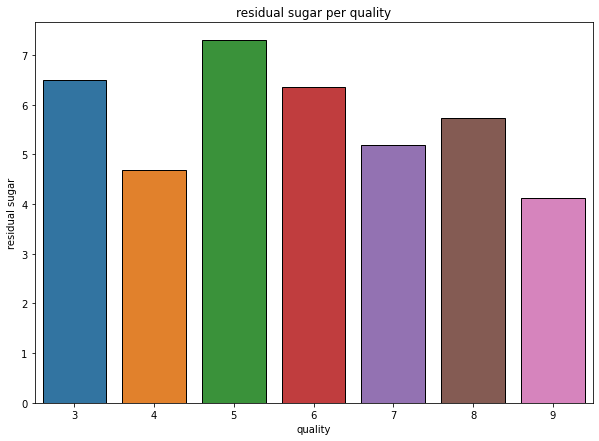

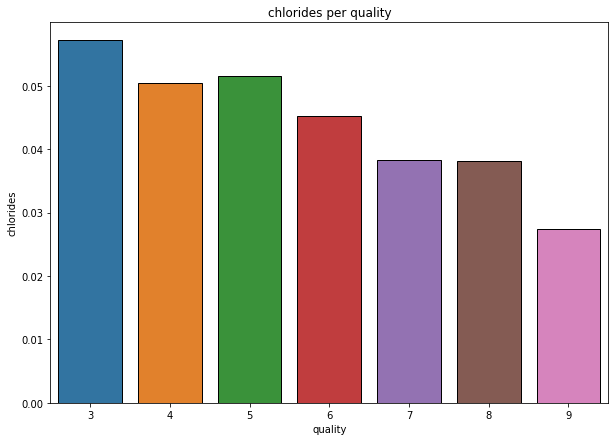

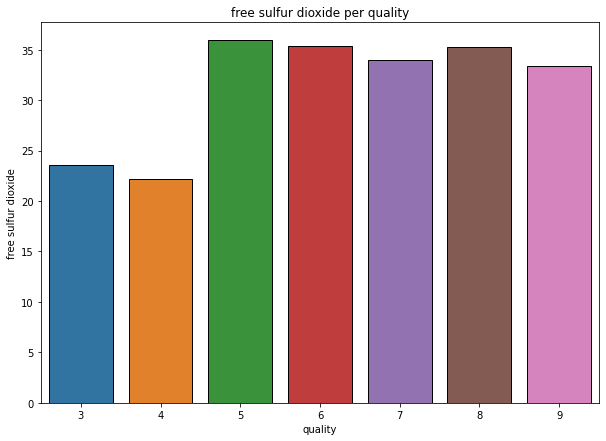

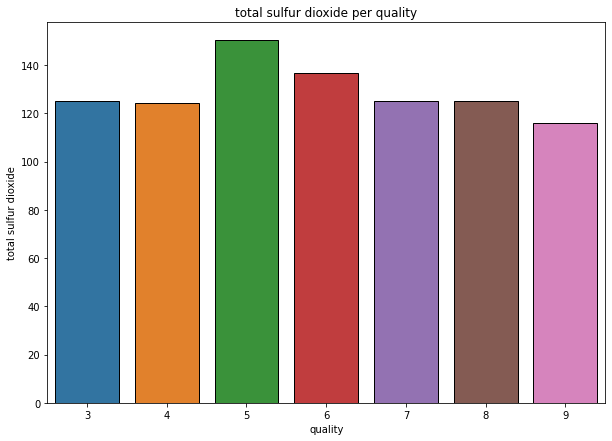

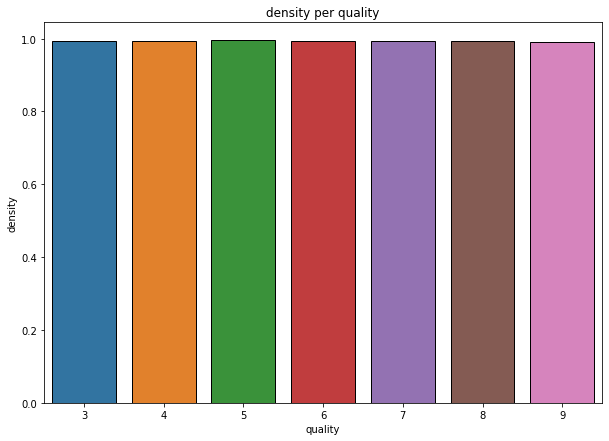

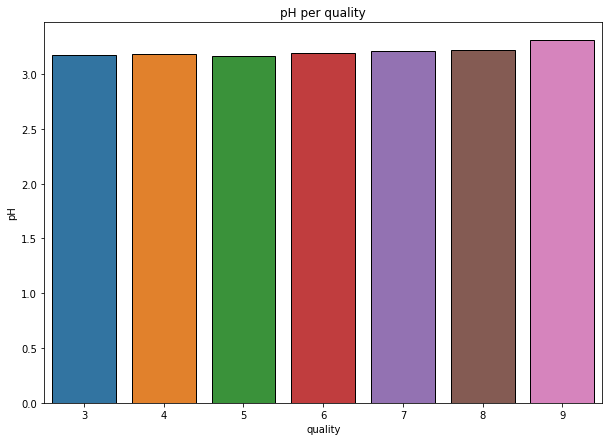

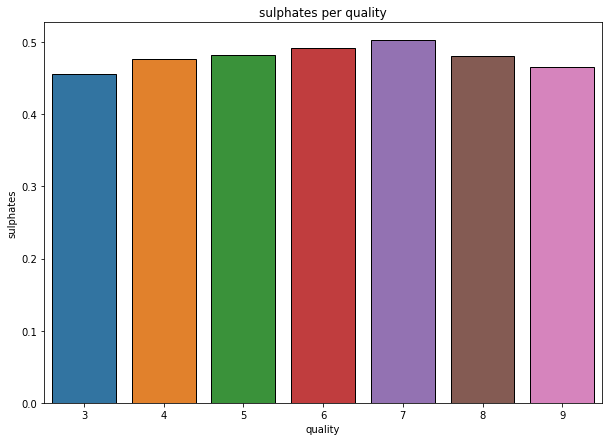

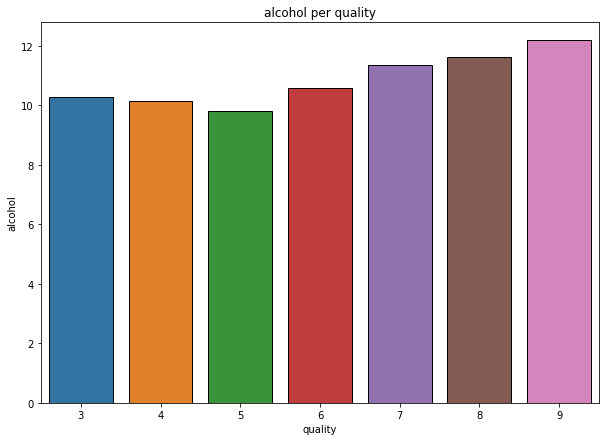

In [26]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for c in cols:
    plt.figure(figsize=(10,7))
    sns.barplot(y=c, x='quality', data=df, edgecolor='black', ci=None)
    plt.title('{} per quality'.format(c))
    plt.show()

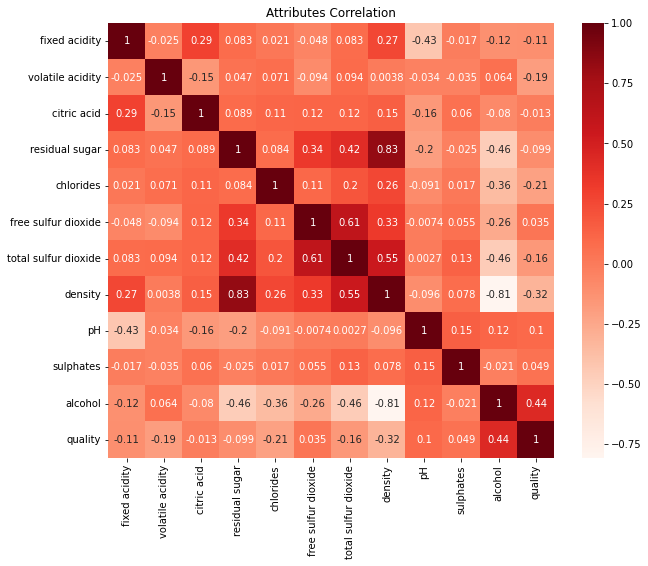

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

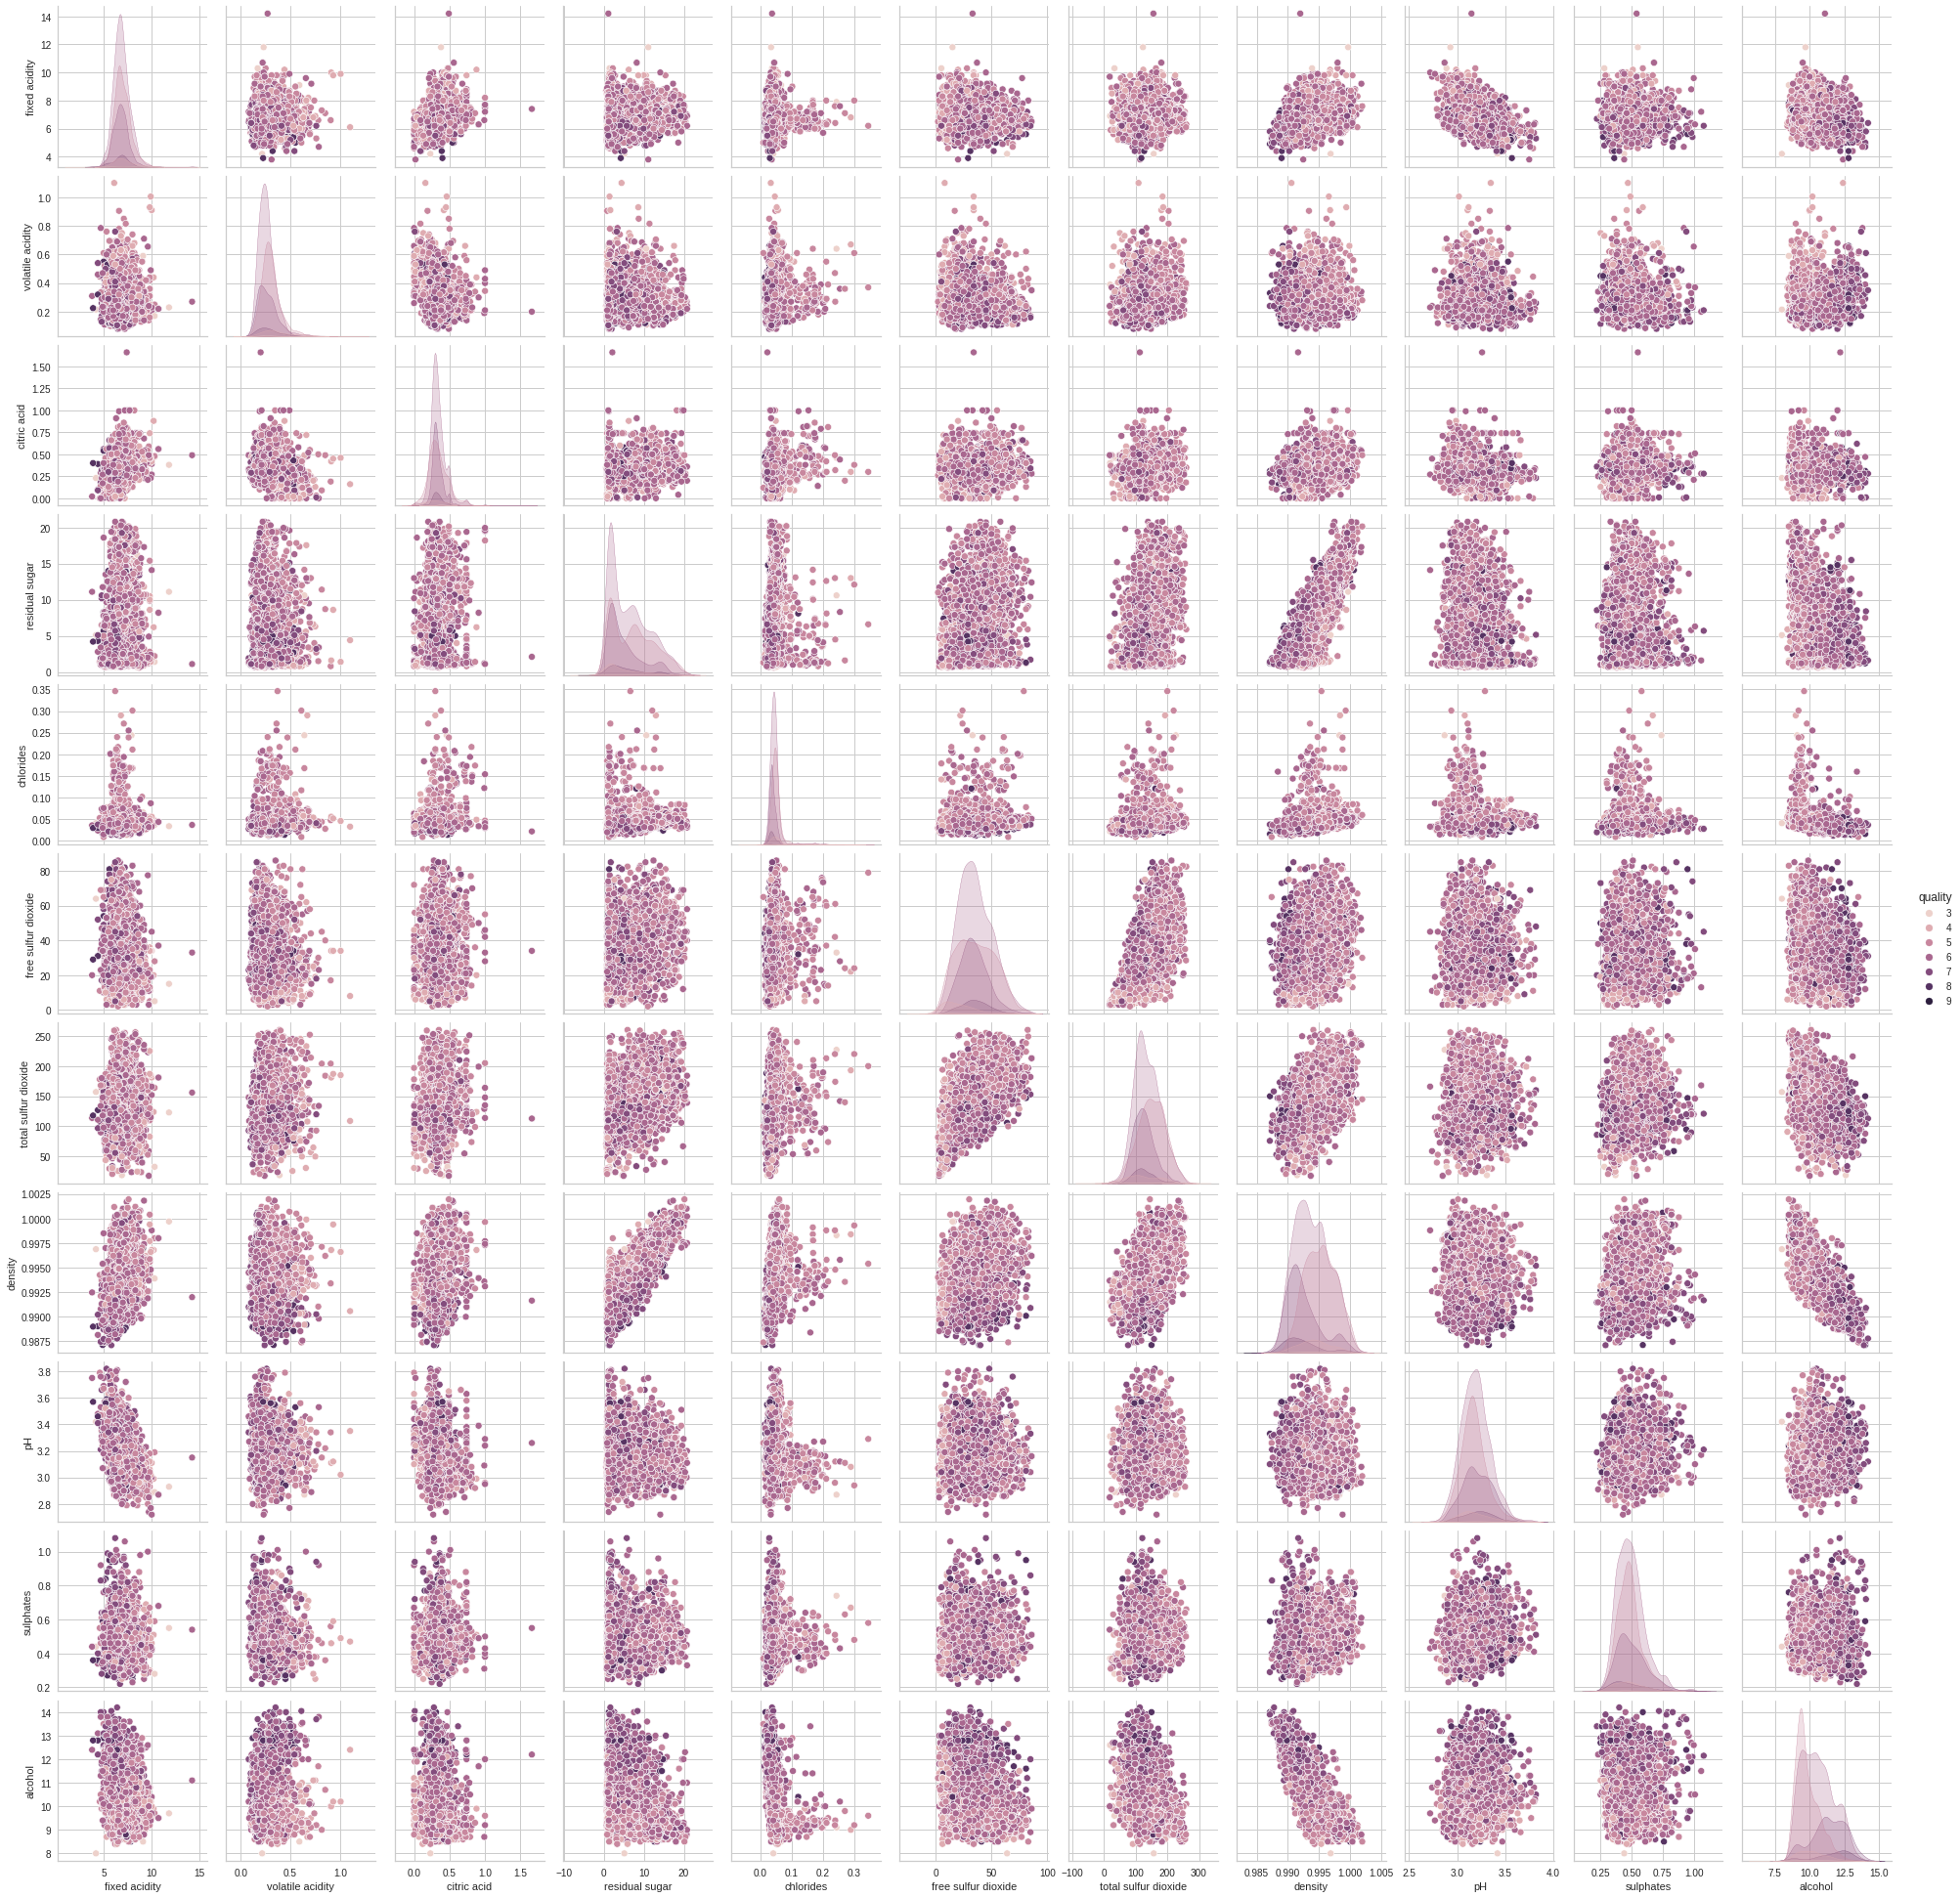

In [31]:
p=sns.pairplot(df, hue = 'quality')

# Train a Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [33]:
X.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  
0      8.8  
1      9.5  
2     10.1

In [34]:
pd.DataFrame(y).head(3)

quality
0        6
1        6
2        6

In [36]:
# Create training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
438             7.4             0.155         0.34             2.3      0.045   
4863            6.2             0.360         0.32             4.0      0.036   
292             7.4             0.280         0.42            19.8      0.066   
2608            7.5             0.250         0.32             8.2      0.024   
4170            7.4             0.160         0.30            13.7      0.056   
...             ...               ...          ...             ...        ...   
4472            7.0             0.280         0.28             1.4      0.039   
472             6.6             0.240         0.29             2.0      0.023   
3119            5.9             0.190         0.37             0.8      0.027   
3811            7.2             0.280         0.38             2.0      0.052   
867             7.8             0.180         0.46            12.6      0.042   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
438                  73.5                 214.0  0.99340  3.18       0.61   
4863                 44.0                  92.0  0.98936  3.20       0.50   
292                  53.0                 195.0  1.00000  2.96       0.44   
2608                 53.0                 209.0  0.99563  3.12       0.46   
4170                 33.0                 168.0  0.99825  2.90       0.44   
...                   ...                   ...      ...   ...        ...   
4472                 12.0                  83.0  0.99173  3.18       0.65   
472                  19.0                  86.0  0.99000  3.25       0.45   
3119                  3.0                  21.0  0.98970  3.09       0.31   
3811                 23.0                 156.0  0.99120  3.13       0.52   
867                  41.0                 143.0  1.00000  3.24       0.76   

      alcohol  
438       9.9  
4863     13.3  
292       9.1  
2608     10.8  
4170      8.7  
...       ...  
4472     11.1  
472      12.5  
3119     10.8  
3811     11.1  
867       8.5  

[3879 rows x 11 columns]

In [38]:
pd.DataFrame(y_train)

quality
438         7
4863        7
292         5
2608        6
4170        7
...       ...
4472        5
472         6
3119        5
3811        5
867         8

[3879 rows x 1 columns]

In [39]:
len(X_train), len(y_train)

(3879, 3879)

In [40]:
len(X_test), len(y_test)

(970, 970)

In [41]:
models = {
        "Logistic Regression" : LogisticRegression(max_iter=10000),
        "KNN" : KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()
         }
         
def fit_and_score(models, X, y, X_train, X_test, y_train, y_test, random_seed=42):
    global model_accuracy, model_cross_validation
    np.random.seed(random_seed)
    model_accuracy = {}
    model_cross_validation = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_accuracy[name] = model.score(X_test, y_test)
        cvs = cross_val_score(model, X, y, cv=5)
        model_cross_validation[name] = np.mean(cvs)
    
    return model_accuracy, model_cross_validation

In [42]:
fit_and_score(models, X, y, X_train, X_test, y_train, y_test)

({'Logistic Regression': 0.5422680412371134,
  'KNN': 0.5278350515463918,
  'Random Forest': 0.7010309278350515},
 {'Logistic Regression': 0.5180475141765876,
  'KNN': 0.39864138818848216,
  'Random Forest': 0.5221714382985967})

In [43]:
accuracy_scores = pd.DataFrame(model_accuracy, index=["Accuracy"])
cross_val_scores = pd.DataFrame(model_cross_validation, index=["Cross Validated Scores"])

In [44]:
accuracy_scores

Logistic Regression       KNN  Random Forest
Accuracy             0.542268  0.527835       0.701031

In [45]:
cross_val_scores

Logistic Regression       KNN  Random Forest
Cross Validated Scores             0.518048  0.398641       0.522171

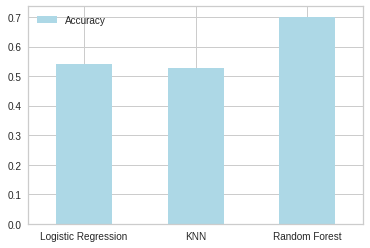

In [46]:
accuracy_scores.T.plot.bar(figsize=(6, 4), color=["Lightblue"])
plt.xticks(rotation=360)
plt.show()

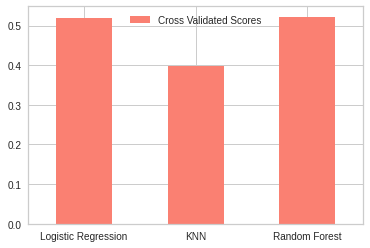

In [47]:
cross_val_scores.T.plot.bar(figsize=(6, 4), color=["Salmon"])
plt.xticks(rotation=360)
plt.show()

# HyperParameter Tuning

In [48]:
train_scores = []
test_scores = []

neighbours = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [49]:
train_scores

[1.0,
 0.7901521010569734,
 0.7326630574890436,
 0.6767208043310131,
 0.6506831657643722,
 0.6282547048208301,
 0.5978344934261408,
 0.5821087909254963,
 0.5676720804331014,
 0.560195926785254,
 0.559938128383604,
 0.5565867491621552,
 0.5552977571539056,
 0.5516885795308069,
 0.5434390306780098,
 0.5339004898169631,
 0.5251353441608662,
 0.519979376127868,
 0.5207527713328177,
 0.5145656096932198]

In [50]:
test_scores

[0.5969072164948453,
 0.5319587628865979,
 0.48762886597938143,
 0.5030927835051546,
 0.5278350515463918,
 0.5237113402061856,
 0.5072164948453608,
 0.5154639175257731,
 0.5010309278350515,
 0.4948453608247423,
 0.4896907216494845,
 0.488659793814433,
 0.4927835051546392,
 0.488659793814433,
 0.48762886597938143,
 0.48556701030927835,
 0.4917525773195876,
 0.488659793814433,
 0.47525773195876286,
 0.48041237113402063]

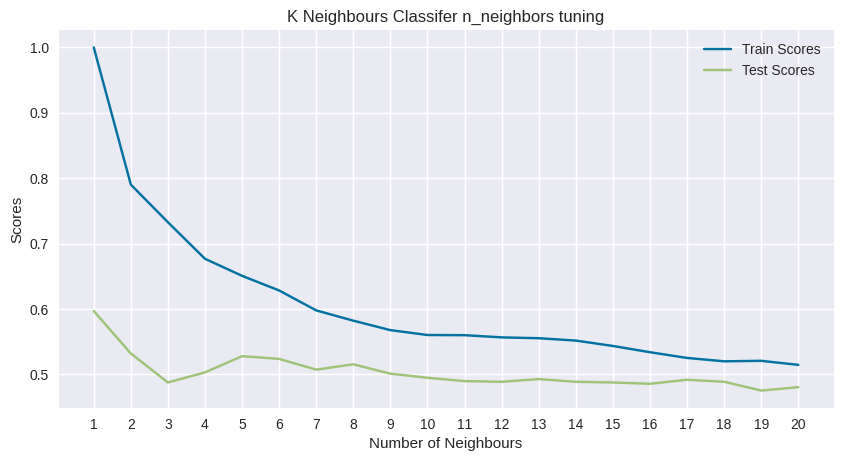

Max KNN score on train data: 100.00%
Max KNN score on test data: 59.69%


In [51]:
plt.style.use("seaborn-darkgrid")

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

ax.plot(neighbours, train_scores, label = "Train Scores")
ax.plot(neighbours, test_scores, label = "Test Scores")

plt.title("K Neighbours Classifer n_neighbors tuning")
plt.xlabel("Number of Neighbours")
plt.ylabel("Scores")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

print(f"Max KNN score on train data: {max(train_scores)*100:.2f}%")
print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")

## HyperParameter Tuning with RandomizedSearchCV

In [52]:
logistic_regression_grid = {"C" : np.logspace(-4, 4, 20),
                           "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                           "penalty" : ["none", "11", "l2"]
                           }

random_forest_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10], 
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [53]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(solver='lbfgs', max_iter=100),
                               param_distributions=logistic_regression_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=False)

rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                  

In [54]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 4.281332398719396}

In [55]:
rs_log_reg.score(X_test, y_test)

0.5422680412371134

In [56]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_forest_grid,
                          cv = 5,
                          n_iter = 10,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [57]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [58]:
rs_rf.score(X_test, y_test)

0.634020618556701

## Hyperparamter Tuning with GridSearchCV

In [59]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

grid_search_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

grid_search_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.2s finished


In [60]:
grid_search_log_reg.best_params_

{'C': 2807.2162039411755, 'solver': 'liblinear'}

In [61]:
grid_search_log_reg.score(X_test, y_test)

0.5463917525773195

# Evaluting our ML Model

In [63]:
y_preds = rs_rf.predict(X_test)

In [64]:
y_preds

array([6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 7, 6, 6,
       5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 6, 7, 5, 6, 6, 6,
       5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 7, 5, 7, 6, 6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       7, 7, 6, 6, 5, 6, 5, 7, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 5, 5,
       6, 6, 6, 6, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 5, 5,

In [66]:
print(confusion_matrix(y_test, y_preds))

[[  0   0   2   3   0   0]
 [  0   0  18  10   0   0]
 [  0   0 183 108   2   0]
 [  0   0  75 356  29   0]
 [  0   0   4  77  75   0]
 [  0   0   0  18   9   1]]


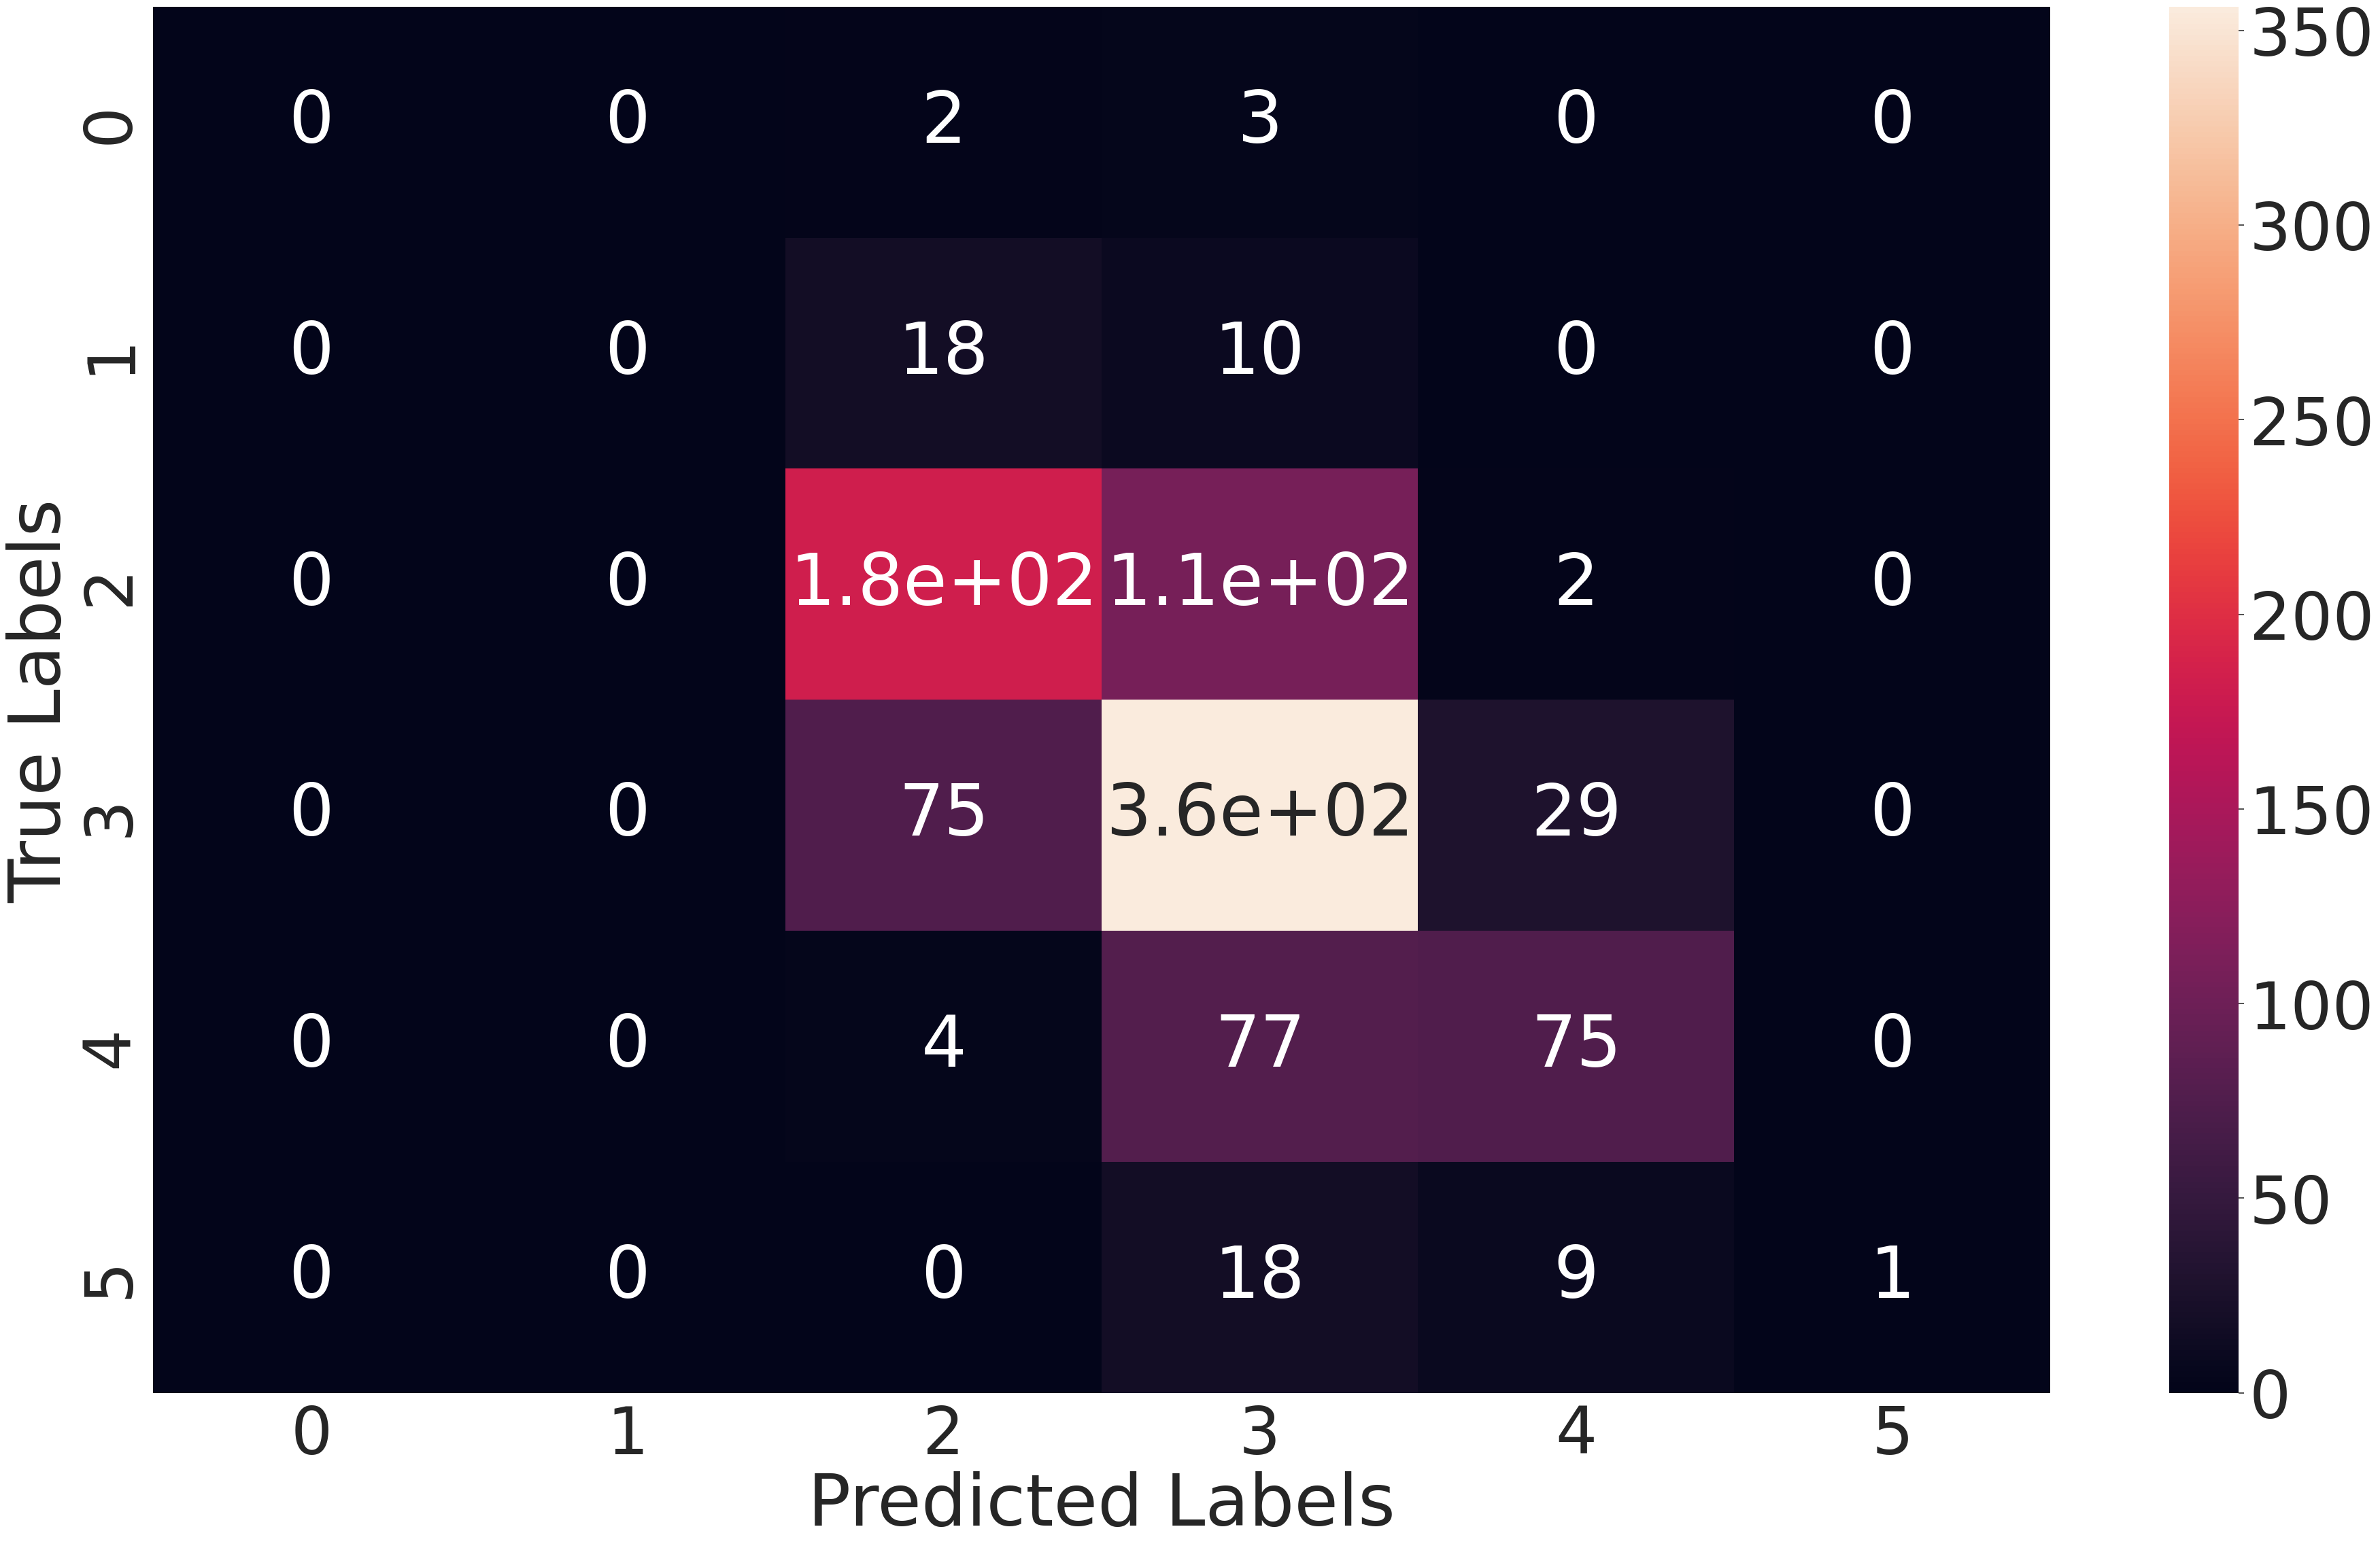

In [71]:
sns.set(font_scale = 7)

def plot_conf_matrix(y_test, y_preds):  
    fig, ax = plt.subplots(figsize = (50, 30), dpi=90)
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
plot_conf_matrix(y_test, y_preds)    

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        28
           5       0.65      0.62      0.64       293
           6       0.62      0.77      0.69       460
           7       0.65      0.48      0.55       156
           8       1.00      0.04      0.07        28

    accuracy                           0.63       970
   macro avg       0.49      0.32      0.32       970
weighted avg       0.62      0.63      0.61       970

